In [1]:
from PIL import Image
import pandas as pd 
import os
import numpy as np 
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid import ImageGrid
from sklearn.model_selection import train_test_split

<ipython-input-1-a64e9cc07a51>:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import ImageGrid


In [2]:
# Path to all data
DATA_PATH = "../kaggle_3m/"

Preprocessing 

In [126]:
from preprocessing import load_dataset

In [98]:
dataset_1=load_dataset(DATA_PATH)
dataset_1.head()

,patient_id,image_path,image_data,mask_path,mask_data,tumor
0,TCGA_CS_4941_19960909_1,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,TCGA_CS_4941_19960909_10,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,TCGA_CS_4941_19960909_11,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[1, 1, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 2, 3, 5,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,TCGA_CS_4941_19960909_12,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[4, 2, 2, 4, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2, 3,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,TCGA_CS_4941_19960909_13,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[3, 1, 2, 3, 2, 3, 4, 5, 6, 5, 3, 2, 2, 2, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [3]:
data_path_2='../kaggle_3m/'

In [100]:
dataset=load_dataset(data_path_2)
dataset.sample()

,patient_id,image_path,image_data,mask_path,mask_data,tumor
3230,TCGA_HT_7855_19951020_13,../dataset_mri/kaggle_3m/TCGA_HT_7855_19951020...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",../dataset_mri/kaggle_3m/TCGA_HT_7855_19951020...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [4]:
dataset = pd.read_pickle('../dataset.data')

In [101]:
dataset.columns

Index(['patient_id', 'image_path', 'image_data', 'mask_path', 'mask_data',
       'tumor'],
      dtype='object')

Visualisation of tumor presence frequency

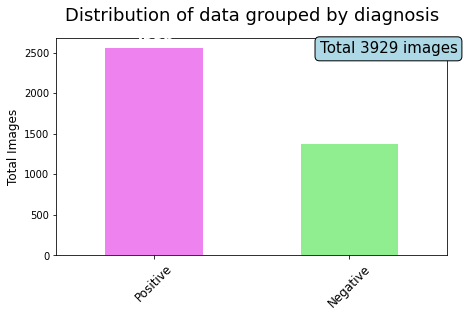

In [102]:
# Plot
ax = dataset.tumor.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(7, 4),
                                     color=["violet", "lightgreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(dataset.tumor.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12), 
                rotation=0, color="white", 
                ha="center", verticalalignment='bottom', 
                fontsize=15, fontweight="bold")
    
ax.text(1.2, 2550, f"Total {len(dataset)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );



Data visualisation


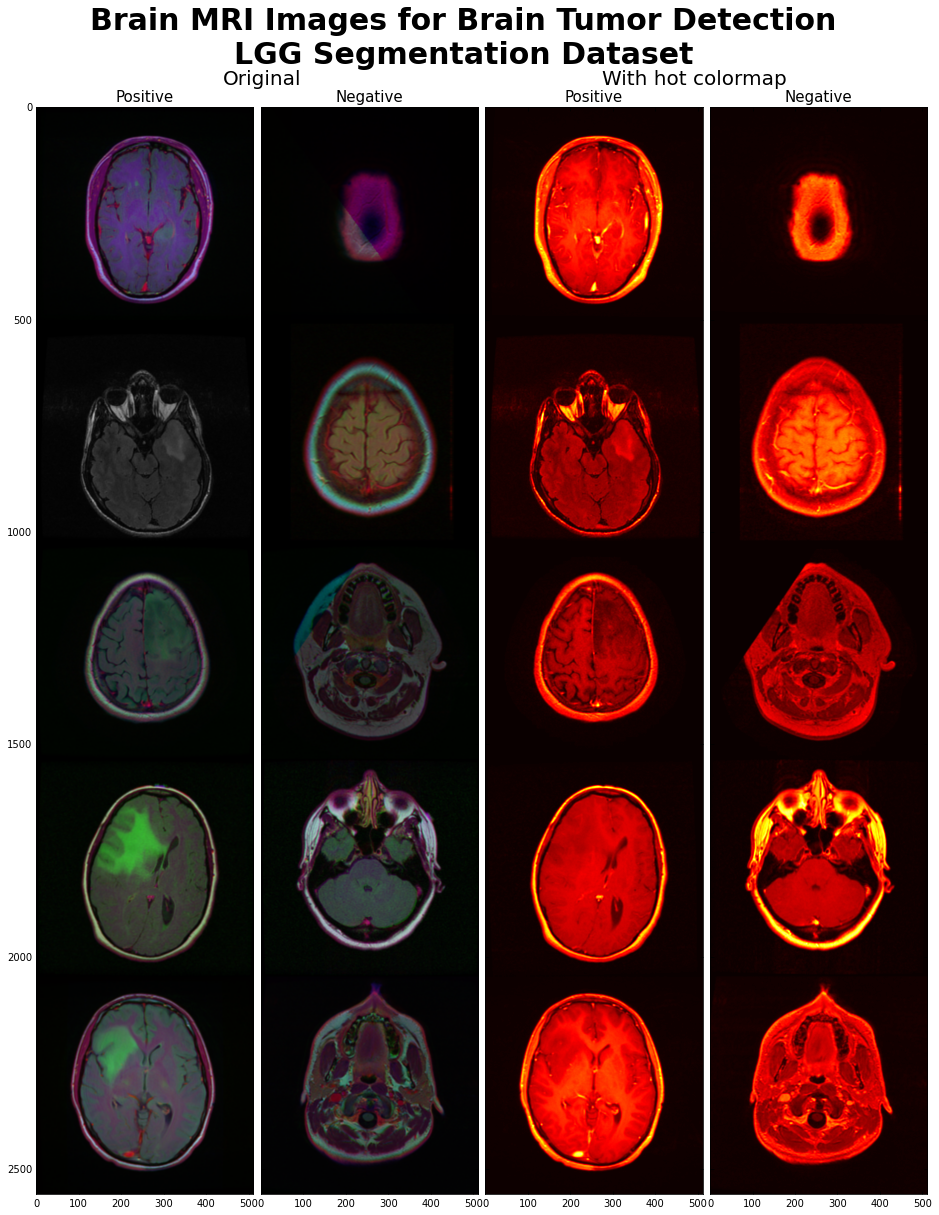

In [103]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(5).image_path.values
sample_no_df = dataset[dataset["tumor"] == 0].sample(5).image_path.values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])


sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:,:,0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:,:,0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")#set_title("No", fontsize=15)

# annotations
plt.figtext(0.36,0.90,"Original", va="center", ha="center", size=20)
plt.figtext(0.66,0.90,"With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()

Data preparation

In [5]:
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn

In [6]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [7]:
data_transforms = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    #transforms.Normalize(mean=mean, std=std)
])

Use pytorch dataloader to import dataset (warning folders contain both mask and images)

In [8]:
from torchvision import datasets, transforms
from torch.utils import data

dataset_full = datasets.ImageFolder(root = data_path_2, 
                transform = transforms.ToTensor())

loader = data.DataLoader(dataset_full, batch_size = 8, shuffle = True)

In [12]:
loader.dataset

Dataset ImageFolder
    Number of datapoints: 7858
    Root location: ../kaggle_3m/
    StandardTransform
Transform: ToTensor()

Issue : It cannot separat masks from images

Template of data loader for segmentation problems

In [13]:
import torch.utils.data as data

class DataLoaderSegmentation(data.Dataset):
    def __init__(self, folder_path):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = dataset['image_path']
        self.mask_files =dataset['mask_path']
    def __getitem__(self, index):
        img_path = self.img_files[index]
        mask_path = self.mask_files[index]
        data = Image.open(img_path)
        label =Image.open(mask_path)
        return torch.from_numpy(data).float(), torch.from_numpy(label).float()
    def __len__(self):
        return len(self.img_files)

In [16]:
loader = DataLoaderSegmentation(data_path_2)

In [17]:
print(len(loader))

3929


In [18]:
print(loader.img_files)

0       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
1       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
2       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
3       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
4       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
                              ...                        
3924    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3925    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3926    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3927    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3928    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
Name: image_path, Length: 3929, dtype: object


In [19]:
print(loader.mask_files)

0       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
1       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
2       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
3       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
4       ./kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941...
                              ...                        
3924    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3925    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3926    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3927    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
3928    ./kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B...
Name: mask_path, Length: 3929, dtype: object


In [20]:
np.random.seed(42)
samples_train, samples_test = train_test_split(loader.img_files)
samples_train, samples_val = train_test_split(samples_train,test_size=0.2)

print("Nombre d'images de train : %i" % len(samples_train))
print("Nombre d'images de val : %i" % len(samples_val))
print("Nombre d'images de test : %i" % len(samples_test))

Nombre d'images de train : 2356
Nombre d'images de val : 590
Nombre d'images de test : 983


Autre option 

In [9]:
class BrainMriDataset(Dataset):
    def __init__(self, df, transforms):
        
        self.df = df
        self.transforms = transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = cv2.imread(self.df.iloc[idx, 1])
        mask = cv2.imread(self.df.iloc[idx, 3], 0)
        
        augmented_img = self.transforms(image)
        
        return augmented_img, self.df.iloc[idx, 5]


In [10]:
# Split df into train_df and val_df
df=dataset
train_df, val_df = train_test_split(df, stratify=df.tumor, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
train_df, test_df = train_test_split(train_df, stratify=train_df.tumor, test_size=0.15)
train_df = train_df.reset_index(drop=True)

#train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (3005, 6) 
Val: (393, 6) 
Test: (531, 6)


In [107]:
print(df.iloc[1, 5])

0


Trnasorms / data augmentataion

In [11]:
data_transforms = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor()
])

In [12]:
# train
train_dataset = BrainMriDataset(df=train_df, transforms=transforms.ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=26, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, transforms=transforms.ToTensor())
val_dataloader = DataLoader(val_dataset, batch_size=26, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, transforms=transforms.ToTensor())
test_dataloader = DataLoader(test_dataset, batch_size=26, num_workers=4, shuffle=True)

Classifier

In [137]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [13]:
# Previous cell does not work on my computer (cuda version deprecated)
device = torch.device('cpu')

In [14]:
from model_classifier import *

In [26]:
# Needed to reload model_classifier functions after a change in code
import importlib, sys
importlib.reload(sys.modules['model_classifier'])
from model_classifier import *

In [28]:
def build_model():
    model = Net()
    # defining the optimizer
    optimizer = Adam(model.parameters(), lr=0.07)
    # defining the loss function
    criterion = CrossEntropyLoss()
    # checking if GPU is available
    if torch.cuda.is_available():
        model = model.cuda()
        criterion = criterion.cuda() 

In [115]:
def build_model():
    model = Net()
    # defining the optimizer
    optimizer = Adam(model.parameters(), lr=0.07)
    # defining the loss function
    criterion = CrossEntropyLoss()

In [116]:
model=build_model()

In [114]:
# we use GPU if available, otherwise CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#puts model to gpu or cpu
model.to(device)

cpu


AttributeError: 'NoneType' object has no attribute 'to'

In [27]:
model = Net()

# Puts model on GPU/CPU
model.to(device)

# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()

In [28]:
# main loop (train+test)
for epoch in range(10):
    # training
    model.train() # mode "train" agit sur "dropout" ou "batchnorm"
    for batch_idx, (x, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        x, target = Variable(x).to(device), Variable(target).to(device)
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        if batch_idx %26 ==0:
            print('epoch {} batch {} [{}/{}] training loss: {}'.format(epoch,batch_idx,batch_idx*len(x),
                    len(train_dataloader.dataset),loss.item()))
    # testing
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (x, target) in enumerate(test_dataloader):
            x, target = x.to(device), target.to(device)
            out = model(x)
            loss = criterion(out, target)
            # _, prediction = torch.max(out.data, 1)
            prediction = out.argmax(dim=1, keepdim=True) # index of the max log-probability
            correct += prediction.eq(target.view_as(prediction)).sum().item()
    taux_classif = 100. * correct / len(test_dataloader.dataset)
    print('Accuracy: {}/{} (tx {:.2f}%, err {:.2f}%)\n'.format(correct,
      len(test_dataloader.dataset), taux_classif, 100.-taux_classif))

epoch 0 batch 0 [0/3005] training loss: 0.6811838150024414
epoch 0 batch 26 [676/3005] training loss: 0.5825188755989075
epoch 0 batch 52 [1352/3005] training loss: 0.607050895690918
epoch 0 batch 78 [2028/3005] training loss: 0.6895261406898499
epoch 0 batch 104 [2704/3005] training loss: 0.6665087342262268
Accuracy: 345/531 (tx 64.97%, err 35.03%)

epoch 1 batch 0 [0/3005] training loss: 0.5967939496040344
epoch 1 batch 26 [676/3005] training loss: 0.7472721934318542
epoch 1 batch 52 [1352/3005] training loss: 0.5706650614738464
epoch 1 batch 78 [2028/3005] training loss: 0.6483885645866394
epoch 1 batch 104 [2704/3005] training loss: 0.645217776298523
Accuracy: 345/531 (tx 64.97%, err 35.03%)

epoch 2 batch 0 [0/3005] training loss: 0.603337824344635
epoch 2 batch 26 [676/3005] training loss: 0.7022013068199158
epoch 2 batch 52 [1352/3005] training loss: 0.5824974775314331
epoch 2 batch 78 [2028/3005] training loss: 0.7215040922164917
epoch 2 batch 104 [2704/3005] training loss: 0.6